## Entropy Based Metrics

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from FinancialMachineLearning.data_loader.tickers import WikipediaStockListing

tickers = WikipediaStockListing()
sp100_tickers = tickers.sp100()['Symbol'].tolist()

In [2]:
from curl_cffi import requests
session = requests.Session(
    impersonate = 'chrome'
)

data = yf.download(
    sp100_tickers,
    start = '2020-01-01',
    progress = False,
    auto_adjust = True,
    session = session,
    interval = '1d'
)

In [3]:
ret = data['Close'].pct_change().iloc[1:]

In [16]:
ret = ret.dropna()

In [4]:
ret.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.009722,-0.009492,-0.012191,-0.001665,-0.007834,-0.007728,-0.010183,-0.006789,0.000481,-0.012139,...,-0.013275,-0.010120,-0.007078,-0.000599,-0.011655,-0.007953,-0.010647,-0.006140,-0.008828,-0.008039
2020-01-06,0.007968,0.007892,0.005239,-0.006530,0.005726,0.000779,-0.004321,0.007674,-0.000263,0.014886,...,-0.006961,0.006942,-0.008564,-0.004455,-0.013673,-0.002162,-0.002152,-0.005990,-0.002036,0.007678
2020-01-07,-0.004703,-0.005705,-0.005559,-0.021590,-0.000959,-0.005642,-0.002893,-0.009405,-0.021308,0.002092,...,0.019298,-0.006037,-0.007580,-0.001721,-0.009530,-0.002643,-0.011117,-0.008286,-0.009265,-0.008184
2020-01-08,0.016086,0.007088,0.004076,0.001961,0.013438,0.011739,-0.008705,0.000756,0.008673,-0.007809,...,0.002704,0.021084,0.010951,0.005690,-0.002099,0.017118,0.001846,0.003038,-0.003432,-0.015080
2020-01-09,0.021241,0.007708,0.002668,0.008907,0.007636,0.011023,0.023834,0.002981,0.003767,0.004799,...,0.012099,-0.005677,-0.005111,0.002314,0.000350,0.006930,-0.004146,-0.001704,0.010330,0.007656


### Marginal & Joint Entropy

상관계수 개념은 세 가지 중요한 결점을 제공한다. 첫째, 이는 두 랜덤 변수 간의 선형 상호의존성을 계량화한다. 이는 비선형관계를 무시한다. 둘째, 상관계수는 특이치에 크게 영향을 받는다. 셋째, 다변수 정규 분포의 경우를 넘어서는 응용은 의심스럽다. 우리는 어떤 두 실수 변수 간의 상관관계를 포착하고 싶지만, 두 변수가 이변수 정규분포를 따르지 않는다면 상관계수는 일반적으로 의미가 없어진다. 이러한 결함을 극복하고자 몇가지 정보이론 개념을 도입해야 한다.

$X$를 확률 $p(x)$로 집합 $S_X$로부터 $x$값을 취하는 이산 랜덤 변수라 하자. $X$의 엔트로피는 다음과 같이 정의된다.

$$H(X) = - \sum_{x \in S_X} p(x)\log(p(x))$$

이번 장을 통틀어서 $\lim_{p \rightarrow 0^+} p\log[p] = 0$이므로 $0\log[0] = 0$의 관행을 따를 것이다. 값 $\frac{1}{p[x]}$는 하나의 관측이 얼마나 예상하지 못했는가를 측정한다. 왜냐하면 예상하지 못한 관측은 낮은 확률로 특징지어지기 때문이다. 엔트로피는 이들의 예상치 못한 정도의 기대값이며, $\log[\cdot]$함수는 $p[x]$가 $\frac{1}{p[x]}$를 상쇄하는 것을 방지하고, 엔트로피에 바람직한 수학적 특성을 부여한다. 따라서 엔트로피는 $X$와 연관된 불확실성의 양으로 해석할 수 있다. 모든 확률이 $S_X$의 하나의 원소에 집중될 때 엔트로피는 0이다. 엔트로피는 $X$가 균등 분포, 즉 $p[x] = \frac{1}{\Vert S_X\Vert}, \forall x \in S_X$일 때 $\log[\Vert S_X\Vert]$에서 최대값에 도달한다.

$Y$를 확률 $p[y]$로 집합 $S_Y$로부터 $y$값을 취하는 이산 랜덤 변수라 하자. 랜덤 변수 $X$와 $Y$는 동일한 확률 공간에서 정의될 필요는 없다. $X$와 $Y$의 joint entropy는 다음과 같다

$$H[X,Y] = - \sum_{x,y \in S_X \times S_Y} p[x,y] \log[p[x,y]]$$

특히 $H[X,Y] = H[Y,X], H[X,X] = H[X], H[X,Y] \geq \max \{H[X],H[Y]\}$이고, $H[X,Y]\leq H[X] + H[Y]$이다. shannon's entropy는 단지 이산 랜덤 변수에 대해서만 유한하다는 것을 인지하는 것이 중요하다. 연속인 경우 이산 포인트의 극한 밀도 (LDDP, Limiting Density of Discrete Point)를 사용하거나 랜덤 변수를 이산화해야 한다.

In [5]:
import scipy.stats as ss

In [10]:
data['Close']['AAPL']

Date
2020-01-02     72.620834
2020-01-03     71.914810
2020-01-06     72.487839
2020-01-07     72.146950
2020-01-08     73.307533
                 ...    
2025-06-27    201.080002
2025-06-30    205.169998
2025-07-01    207.820007
2025-07-02    212.440002
2025-07-03    213.550003
Name: AAPL, Length: 1383, dtype: float64

In [11]:
apple_ret = data['Close']['AAPL'].resample('W-FRI').last().pct_change().iloc[1:]

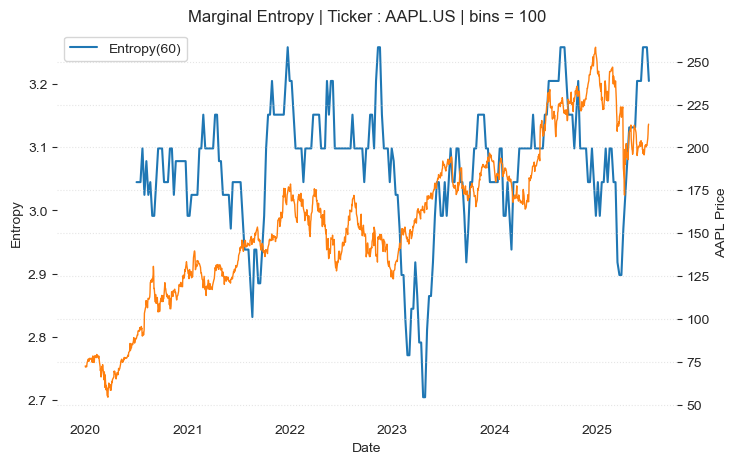

In [12]:
fig, ax1 = plt.subplots(figsize = (8, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy')
ax1.plot(apple_ret.rolling(26).apply(
    lambda x : ss.entropy(np.histogram(x, bins = 100)[0])
))
ax1.tick_params(axis='y')
ax1.legend(['Entropy(60)'], loc='upper left')
ax1.grid(False)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('AAPL Price')
ax2.plot(data[('Close', 'AAPL')], color=color, lw=1, alpha=1)
ax2.tick_params(axis='y')

for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Marginal Entropy | Ticker : AAPL.US | bins = 100')

plt.show()

### Conditional Entropy

$Y$가 주어졌을 때 $X$의 조건부 엔트로피는 다음과 같이 정의된다.

$$H(X|Y) = H(X, Y) - H(Y) = -\sum_{y \in S_Y} p(y) \sum_{x \in S_X}p(x|Y = y)\log(p(x | Y = y))$$

여기서 $p(x | Y = y)$는 $Y$가 $y$값을 취할 때 조건부로 $X$가 $x$값을 취하는 확률이다. 이 정의를 따라서 $H(X|Y)$는 $Y$의 값을 들었을 때 $X$에서 기대하는 불확실성이다. 따라서 $H(X|Y) = 0$이고, $H(X) \geq H(X|Y)$이다.

In [13]:
conditional_entropy = pd.DataFrame(
    dtype = float,
    index = ret.columns,
    columns = ret.columns
)

In [17]:
from sklearn.metrics import mutual_info_score
from tqdm import tqdm

for asset1 in tqdm(ret.columns) :
    for asset2 in ret.columns :
        cXY = np.histogram2d(ret[asset1], ret[asset2])[0]
        hX = ss.entropy(np.histogram(ret[asset1], bins = 100)[0])
        hY = ss.entropy(np.histogram(ret[asset2], bins = 100)[0])
        iXY = mutual_info_score(None, None, contingency = cXY)
        hXY = hX + hY - iXY
        hX_Y = hXY - hY # conditional entropy
        conditional_entropy.loc[asset1, asset2] = hX_Y

100%|██████████| 101/101 [00:04<00:00, 24.81it/s]


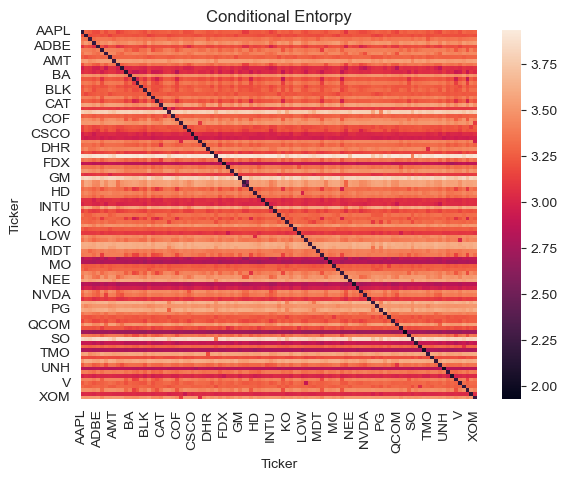

In [18]:
import seaborn as sns

sns.heatmap(conditional_entropy, annot=False)
plt.title('Conditional Entorpy')
plt.show()

### Kullback Leibler Divergence

$p$와 $q$가 동일한 확률 공간에 정의된 2개의 이산 확률 분포라 하자. $p$와 $q$간의 Kullback Leibler Divergence는 다음과 같다.

$$D_{KL}\left[p \Vert q\right] = - \sum_{x \in S_X} p(x) \log \left( \frac{q(x)}{p(x)}\right)
= \sum_{x \in S_X} p(x)\log \left( \frac{p(x)}{q(x)}\right)
$$

여기서 $q(x) = 0 \Rightarrow p(x) = 0$이다. 직관적으로 이 표현은 $p$가 얼마나 기준 분포 $q$로부터 발산하는가를 측정한다. KL발산은 거리 척도가 아니다. 항상 비음이지만, 대칭성 $D_{KL}\left[p \Vert q\right] \leq 0$과 삼각 부등 조건 $\left( D_{KL}\left[p \Vert q\right] \neq D_{KL}\left[q \Vert p\right]\right)$을 위배한다. 두 랜덤 변수가 반드시 동일한 확률 공간에 존재할 필요가 없는 결합 엔트로피의 정의와의 차이를 주목하자. KL발산은 변분 추론에 널리 사용된다.

In [20]:
kl_divergence = pd.DataFrame(
    dtype = float,
    index = ret.columns,
    columns = ret.columns
)

In [21]:
for asset1 in tqdm(ret.columns) :
    for asset2 in ret.columns :
        p_pdf = ss.norm.pdf(
            ret[asset1],
            loc = ret[asset1].mean(), 
            scale = ret[asset1].std()
        )
        q_pdf = ss.norm.pdf(
            ret[asset2], 
            loc = ret[asset2].mean(), 
            scale = ret[asset2].std()
        )
        kl_divergence.loc[asset1,asset2] = ss.entropy(p_pdf, q_pdf)

100%|██████████| 101/101 [00:02<00:00, 47.86it/s]


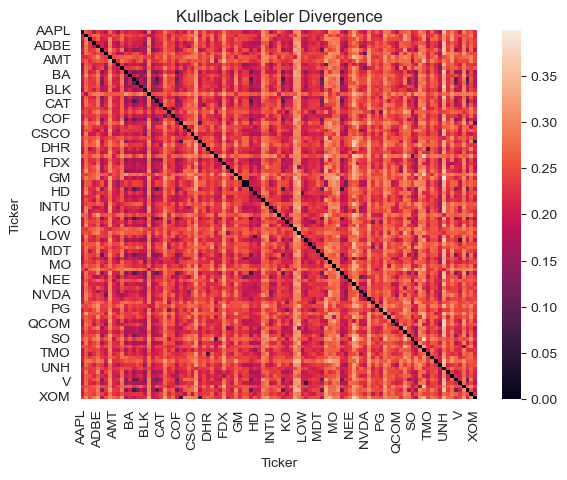

In [22]:
sns.heatmap(kl_divergence, annot=False)
plt.title('Kullback Leibler Divergence')
plt.show()

/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


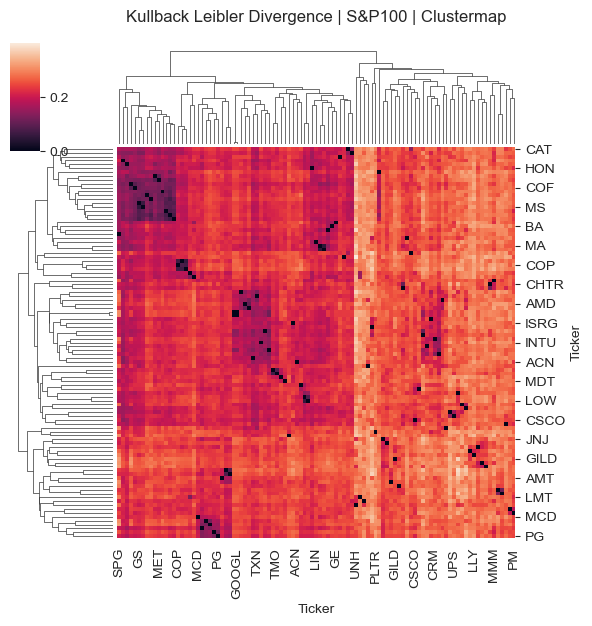

In [23]:
clustermap = sns.clustermap(kl_divergence, annot = False, figsize = (6, 6))
clustermap.ax_heatmap.set_title('Kullback Leibler Divergence | S&P100 | Clustermap', pad = 90)
plt.show()

### Cross Entropy

$p$와 $q$를 동일한 확률 공간에 정의된 2개의 이산 확률 분포라 하자. $p$와 $q$간의 교차 엔트로피는 다음과 같다.

$$H_C\left[ p \Vert q\right] = - \sum_{x \in S_X} p(x) \log(q(x)) = H(X) + D_{KL}(p \Vert q)$$

교차 엔트로피는 진정한 분포 $p$가 아닌 잘못된 분포 $q$를 사용해서 정보 내용을 평가할 때의 $X$와 연관된 불확실성으로 해석될 수 있다. 교차 엔트로피는 분류 문제에 있어서 인기 높은 점수 함수이며, 특히 금융 응용에 유용하다.